# Jungler Pathing in High Elo Games

Goal: create a heatmap based on where the jungler for each side will most likely be throughout the game.

Purpose: Be better at assuming where an enemy jungler will be at any given minute in a game.

Assumption(s): Early game (0-~8 minutes) will have better data than later game (when laning phase ends), since in-game victory objectives begin to become more volatile the more time goes on.


In [1]:
api_key = "RGAPI-8ccf1561-9a41-4bac-89e5-bd0e4ba6c924"

import random

import cassiopeia as cass

cass.set_riot_api_key(api_key)  # This overrides the value set in your configuration/settings.
#cass.set_riot_api_key(getAPI_key())
# summoner = cass.get_summoner(name="Playboy Carti", region="NA")
# print("{name} is a level {level} summoner on the {region} server.".format(name=summoner.name,
#                                                                           level=summoner.level,
#                                                                           region=summoner.region))

# champions = cass.get_champions(region="NA")
# random_champion = random.choice(champions)
# print("He enjoys playing champions such as {name}.".format(name=random_champion.name))

# print("\n")

# value = cass.get_match(4645309816, region = "NA")
# for participant in value.participants:
#     print(participant.champion.name)

# print("\n")

# for participant in value.participants:
#     print(participant.individual_position.name)
#     playerRole = participant.individual_position.name
#     if (playerRole == "jungle"):
        


teamID: 100 (Blue Team)
teamID: 200 (Red Team)

In [2]:
import pandas as pd


df = pd.read_csv('./datasets/leagueoflegends/combined_interpolated_data.csv')
df.head() #first 5 lines of csv

,MatchID,Time,Player1_X,Player1_Y,Player2_X,Player2_Y,Player3_X,Player3_Y,Player4_X,Player4_Y,...,Distance_6_8,Distance_6_9,Distance_6_10,Distance_7_8,Distance_7_9,Distance_7_10,Distance_8_9,Distance_8_10,Distance_9_10,Teamfight
0,NA1_4647454701,0,554.000000,581.000000,593.00,464.000000,557.000000,345.000000,458.000000,271.00,...,236.019067,324.524267,381.188930,124.326184,235.529191,323.402226,123.600162,234.648674,123.016259,0
1,NA1_4647454701,1,596.566667,751.083333,753.55,576.266667,663.883333,455.516667,594.266667,340.75,...,317.620765,398.464944,352.764776,114.265467,208.005594,212.190015,102.462882,161.464004,120.356600,0
2,NA1_4647454701,2,639.133333,921.166667,914.10,688.533333,770.766667,566.033333,730.533333,410.50,...,425.035137,538.710973,422.569696,133.519741,247.509813,144.642352,120.403636,88.876494,130.992536,0
3,NA1_4647454701,3,681.700000,1091.250000,1074.65,800.800000,877.650000,676.550000,866.800000,480.25,...,543.158128,706.839163,554.681424,172.539191,330.844892,179.664750,165.142908,23.349946,152.161099,0
4,NA1_4647454701,4,724.266667,1261.333333,1235.20,913.066667,984.533333,787.066667,1003.066667,550.00,...,666.318696,887.136169,715.375420,221.095796,433.425923,281.244804,220.961706,63.318174,180.187618,0


In [3]:
player1 = df[df["MatchID"] == "NA1_4647454701"][["Player1_X","Player1_Y"]]
player2 = df[df["MatchID"] == "NA1_4647454701"][["Player2_X","Player2_Y"]]
print(player1)

         Player1_X     Player1_Y
0       554.000000    581.000000
1       596.566667    751.083333
2       639.133333    921.166667
3       681.700000   1091.250000
4       724.266667   1261.333333
...            ...           ...
2276  12559.000000  13028.400000
2277  12625.750000  13029.800000
2278  12692.500000  13031.200000
2279  12759.250000  13032.600000
2280  12826.000000  13034.000000

[2281 rows x 2 columns]


Find Unique Match ID:

In [4]:
uniqueMatchID = df.MatchID.unique()
print(uniqueMatchID)

['NA1_4647454701' 'NA1_4645483939' 'NA1_4598230327' 'NA1_4645309816'
 'NA1_4656152813' 'NA1_4638745154' 'NA1_4643089224' 'NA1_4615565612'
 'NA1_4657777097' 'NA1_4646681514' 'NA1_4645234515' 'NA1_4598324711'
 'NA1_4649185990' 'NA1_4648944767' 'NA1_4648052410' 'NA1_4648390957'
 'NA1_4646423955' 'NA1_4646491566' 'NA1_4644444434' 'NA1_4643993824'
 'NA1_4641811159' 'NA1_4640661873' 'NA1_4646705052' 'NA1_4646708615'
 'NA1_4654339825' 'NA1_4597474294' 'NA1_4641455049' 'NA1_4656960086'
 'NA1_4646675896' 'NA1_4647204793' 'NA1_4649132104' 'NA1_4599742776'
 'NA1_4647097967' 'NA1_4645727097' 'NA1_4646187313' 'NA1_4656769721'
 'NA1_4649341904' 'NA1_4644465188' 'NA1_4644122211' 'NA1_4643048817'
 'NA1_4596989546' 'NA1_4654406885' 'NA1_4644032493' 'NA1_4599447028'
 'NA1_4640560641' 'NA1_4644925727' 'NA1_4647372737' 'NA1_4645337633'
 'NA1_4644981295' 'NA1_4640502501' 'NA1_4643293822' 'NA1_4643019589'
 'NA1_4599696650' 'NA1_4647267754' 'NA1_4620465375' 'NA1_4645850487'
 'NA1_4627554999' 'NA1_4599996001'

In [5]:
import numpy as np


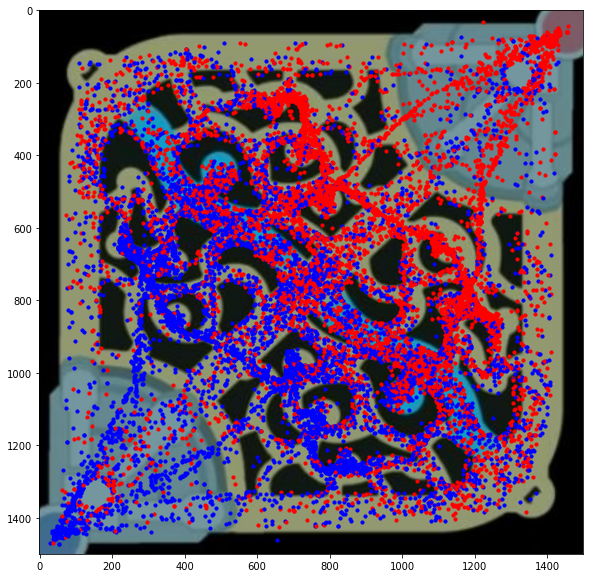

In [6]:
#Stats
import matplotlib.pyplot as plt
import cv2
from colour import Color

img = cv2.imread("./images/summoners-rift.jpg")

rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rbgimgresized = cv2.resize(rgbimg, (1500, 1500))
plt.figure(figsize=(10,10))
plt.imshow(rbgimgresized)
firstFlag = True
for match in uniqueMatchID:
    # print(match)
    jungler1 = df[df["MatchID"] == match][["Player2_X","Player2_Y"]]
    jungler2 = df[df["MatchID"] == match][["Player7_X","Player7_Y"]]
    jungler1_X = jungler1["Player2_X"].values/10
    jungler1_X = jungler1_X[::60]

    jungler1_Y = 1500 - (jungler1["Player2_Y"].values/10)
    jungler1_Y = jungler1_Y[::60]
    plt.scatter(jungler1_X, jungler1_Y, c = "b", s = 10)
    # separate
    jungler2_X = jungler2["Player7_X"].values/10
    jungler2_X = jungler2_X[::60]
    jungler2_Y = 1500 - (jungler2["Player7_Y"].values/10)
    jungler2_Y = jungler2_Y[::60]
    plt.scatter(jungler2_X, jungler2_Y, c = "r", s = 10)
    


    
    


# Raw Scatterplots of Different Times

[TODO]

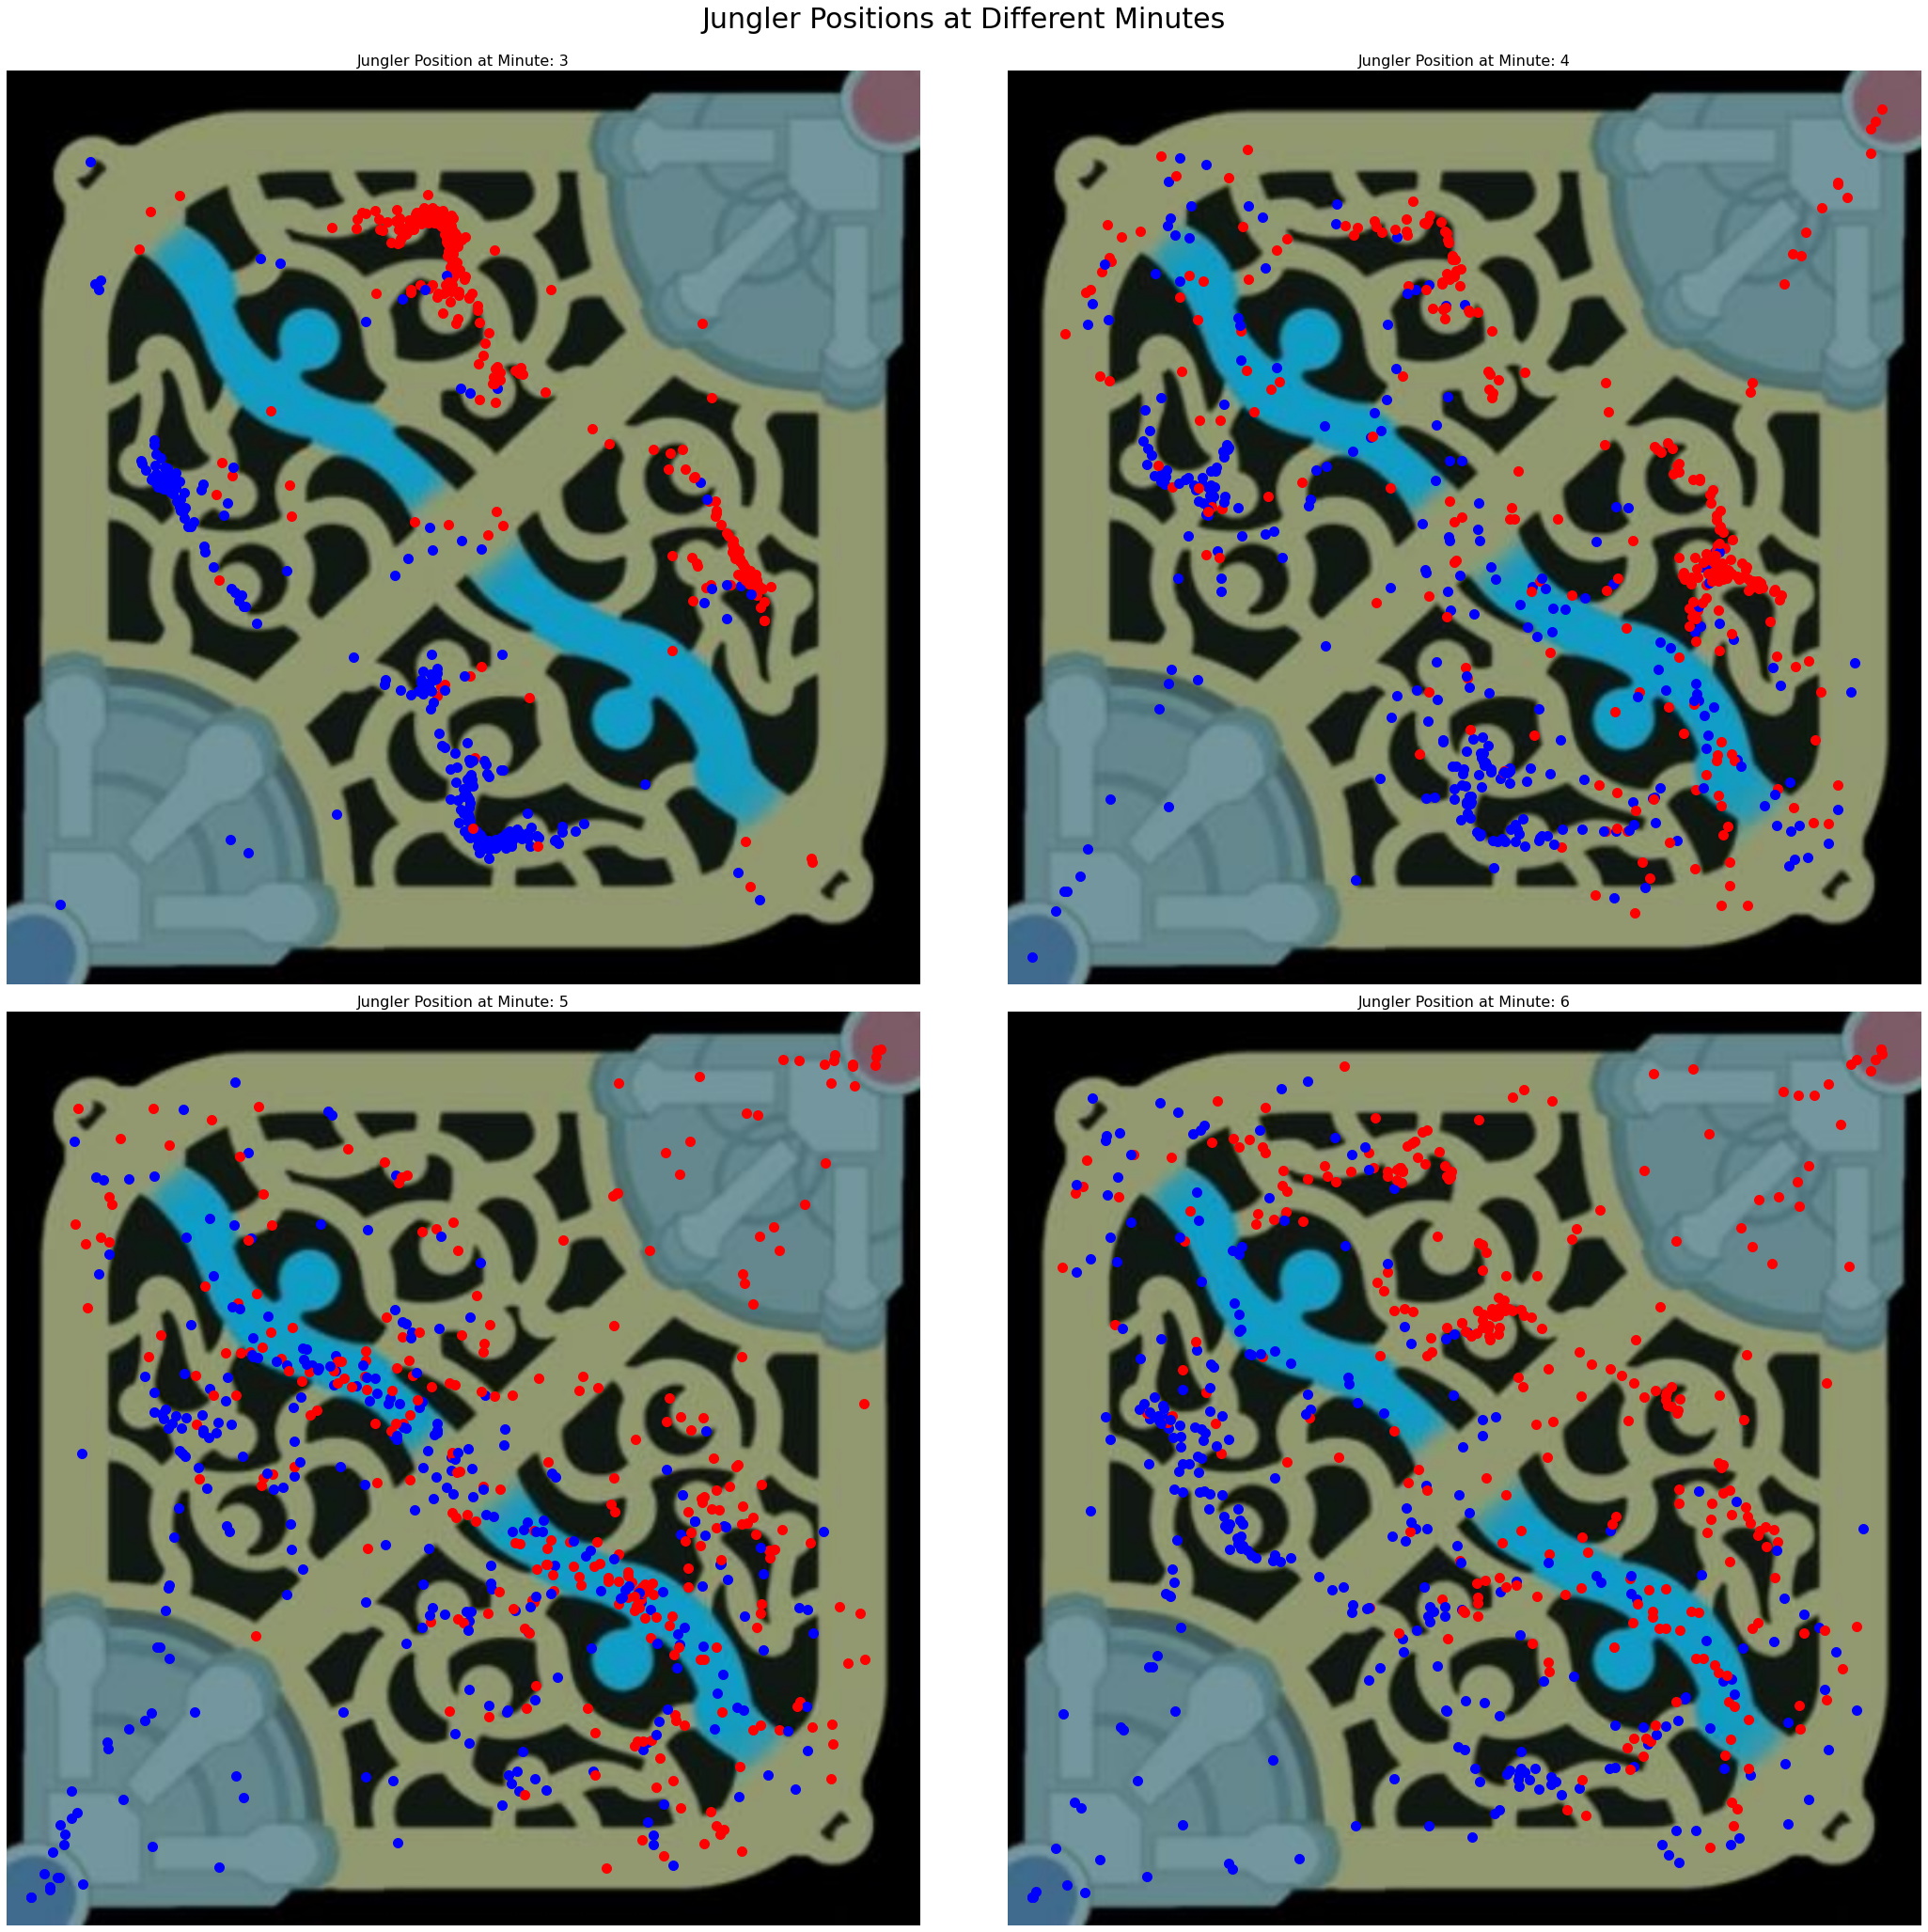

In [9]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("./images/summoners-rift.jpg")

rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rbgimgresized = cv2.resize(rgbimg, (1500, 1500))


# Define the minutes you want to plot
minutes = [2, 3, 4, 5]
# 2 is 3 minutes, 3 is 4 minutes, etc.

# Create subplots
num_plots = len(minutes)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))

for j, minute in enumerate(minutes):
    if j < 4:  # Only iterate for the available subplots (0 to 3)
        row = j // 2
        col = j % 2
        ax = axs[row, col]
        ax.imshow(rbgimgresized)

        for match in uniqueMatchID:
            jungler1 = df[df["MatchID"] == match][["Player2_X", "Player2_Y"]]
            jungler2 = df[df["MatchID"] == match][["Player7_X", "Player7_Y"]]
            jungler1_X = jungler1["Player2_X"].values / 10
            jungler1_X = jungler1_X[::60]
            jungler1_Y = 1500 - (jungler1["Player2_Y"].values / 10)
            jungler1_Y = jungler1_Y[::60]

            jungler2_X = jungler2["Player7_X"].values / 10
            jungler2_X = jungler2_X[::60]
            jungler2_Y = 1500 - (jungler2["Player7_Y"].values / 10)
            jungler2_Y = jungler2_Y[::60]

            # Ensure the index is within bounds
            if minute < len(jungler1_X):
                # Get data for the specific minute
                jungler1_X_minute = jungler1_X[minute]
                jungler1_Y_minute = jungler1_Y[minute]
                ax.scatter(jungler1_X_minute, jungler1_Y_minute, c="b", s=100)

                jungler2_X_minute = jungler2_X[minute]
                jungler2_Y_minute = jungler2_Y[minute]
                ax.scatter(jungler2_X_minute, jungler2_Y_minute, c="r", s=100)


        ax.set_title(f"Jungler Position at Minute: {minute + 1}", fontdict={'fontsize':16})
        ax.axis('off')

plt.suptitle("Jungler Positions at Different Minutes", fontsize = 30)
# Adjust layout and show the plots
plt.tight_layout(rect=[0,0.03,1,.98])
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import cv2

# img = cv2.imread("./images/summoners-rift.jpg")

# rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# rbgimgresized = cv2.resize(rgbimg, (1500, 1500))


# # Define the minutes you want to plot
# minutes = [2, 3, 4, 5]
# # 2 is 3 minutes, 3 is 4 minutes, etc.

# # Create subplots
# num_plots = len(minutes)
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))

# for j, minute in enumerate(minutes):
#     if j < 4:  # Only iterate for the available subplots (0 to 3)
#         row = j // 2
#         col = j % 2
#         ax = axs[row, col]
#         ax.imshow(rbgimgresized)

#         for match in uniqueMatchID:
#             jungler1 = df[df["MatchID"] == match][["Player2_X", "Player2_Y"]]
#             jungler2 = df[df["MatchID"] == match][["Player7_X", "Player7_Y"]]
#             jungler1_X = jungler1["Player2_X"].values / 10
#             jungler1_X = jungler1_X[::60]
#             jungler1_Y = (jungler1["Player2_Y"].values / 10)
#             jungler1_Y = jungler1_Y[::60]

#             jungler2_X = jungler2["Player7_X"].values / 10
#             jungler2_X = jungler2_X[::60]
#             jungler2_Y = (jungler2["Player7_Y"].values / 10)
#             jungler2_Y = jungler2_Y[::60]

#             # Ensure the index is within bounds
#             if minute < len(jungler1_X):
#                 # Get data for the specific minute
#                 jungler1_X_minute = jungler1_X[minute]
#                 jungler1_Y_minute = jungler1_Y[minute]

#                 jungler2_X_minute = jungler2_X[minute]
#                 jungler2_Y_minute = jungler2_Y[minute]

#                 heatmap_data = [[0] * 1500 for _ in range(1500)]
#                 heatmap_data[int(jungler1_Y_minute)][int(jungler1_X_minute)] += 1
#                 heatmap_data[int(jungler2_Y_minute)][int(jungler2_X_minute)] += 1

#         ax.imshow(heatmap_data, cmap="hot", alpha=0.5, extent=(0, 1500, 0, 1500))

#         ax.set_title(f"Jungler Position at Minute: {minute + 1}", fontdict={'fontsize':16})
#         ax.axis('off')

# plt.suptitle("Jungler Positions at Different Minutes", fontsize = 30)
# # Adjust layout and show the plots
# plt.tight_layout(rect=[0,0.03,1,.98])
# plt.show()